<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_2/c_2_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# [Cuaderno en GitHub del Capítulo 2 de Geron](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb)

## Capítulo 2: Proyecto de aprendizaje automático de extremo a extremo

Este cuaderno contiene todo el código de ejemplo y las soluciones a los ejercicios del capítulo 2.

In [1]:
print("Bienvenidos ingenieros Agropecuarios al curso de Métodos Numéricos!")

Bienvenidos ingenieros Agropecuarios al curso de Métodos Numéricos!


Este proyecto requiere Python 3.7 o superior:

## Sobre el módulo sys de python  

Parámetros y funciones específicos del sistema.  

Módulo sys
El módulo sys se importa como
import sys
El módulo provee acceso a funciones y objetos mantenidos por del intérprete.


In [2]:
import sys

sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

También requiere Scikit-Learn ≥ 1.0.1:

In [3]:
import sklearn
sklearn.__version__ >= '1.0.1'

True

## Obtener los datos

¡Bienvenido a Machine Learning Housing Corp.!   

* Su tarea es predecir el precio medio de las viviendas en los distritos de California, dada una serie de atributos de estos distritos.

## Descargar los datos

In [4]:
import pandas as pd

def load_housing_data():
    url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/datasets/vivienda/vivienda.csv'
    return pd.read_csv(url)

v = load_housing_data()

In [5]:
v

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


# Eche un vistazo rápido a la estructura de datos

In [6]:
v.head()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [7]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   precio        20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
v["proximidad"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidad, dtype: int64

In [9]:
v.describe()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,precio
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


La siguiente celda tampoco se muestra en el libro.

Define la función `save_fig()` que se usa a través de este cuaderno para guardar las figuras en alta resolución para el libro.

In [10]:
# código adicional: código para guardar las figuras como PNG de alta resolución para el libro

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

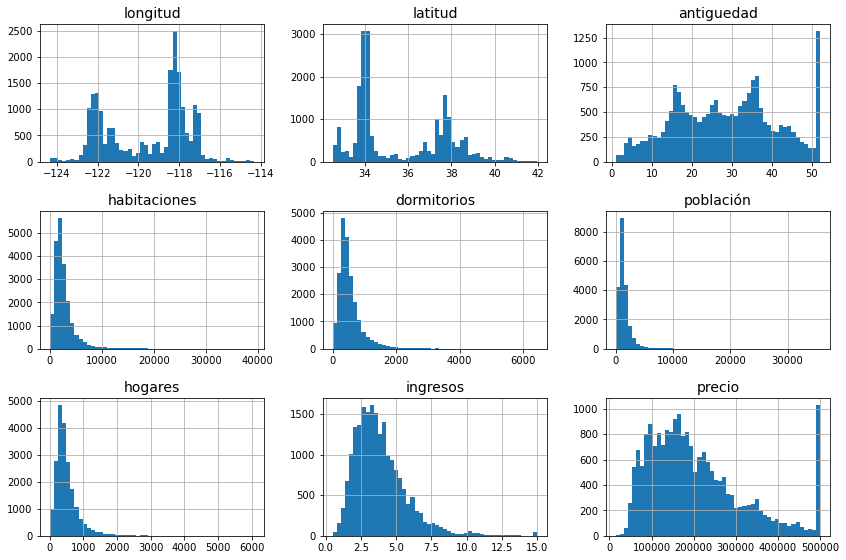

In [11]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

v.hist(bins=50, figsize=(12, 8))
save_fig("Trazo_de_histogramas_de_atributos")  # extra code
plt.show()

# Crear un conjunto de prueba

In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(v, 0.2)
len(train_set) 

16512

In [14]:
len(test_set)

4128

Para asegurarnos de que los resultados de este cuaderno sigan siendo los mismos cada vez que lo ejecutamos, debemos establecer la semilla aleatoria:

In [15]:
np.random.seed(42)

Lamentablemente, esto no garantizará que este portátil produzca exactamente los mismos resultados que en el libro, ya que existen otras posibles fuentes de variación. 

El más importante es el hecho de que los algoritmos se modifican con el tiempo cuando las bibliotecas evolucionan. Entonces, tolere algunas diferencias menores: con suerte, la mayoría de los resultados deberían ser los mismos.

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(v, test_size=0.2, random_state=42)

In [27]:
v.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   precio        20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
test_set["dormitorios"].isnull().sum()

207

Para encontrar la probabilidad de que una muestra aleatoria de 1000 personas contenga menos del 48,5 % de mujeres o más del 53,5 % de mujeres cuando la proporción de mujeres de la población es del 51,1 %, usamos la distribución binomial.

# La distribución binomial

Una distribución binomial es una distribución de probabilidad discreta que describe el número de éxitos al realizar $n$ experimentos independientes entre sí, acerca de una variable aleatoria.

Existen una gran diversidad de experimentos o sucesos que pueden ser caracterizados bajo esta distribución de probabilidad. Imaginemos el lanzamiento de una moneda en el que definimos el suceso “sacar cara” como el éxito. Si lanzamos 5 veces la moneda y contamos los éxitos (sacar cara) que obtenemos, nuestra distribución de probabilidades se ajustaría a una distribución binomial.

El método `cdf()` de la distribución binomial nos da la probabilidad de que el número de hembras sea igual o menor que el valor dado.

In [30]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929909


Si prefiere las simulaciones a las matemáticas, así es como podría obtener aproximadamente el mismo resultado:

In [31]:
# código adicional: muestra otra forma de estimar la probabilidad de una muestra incorrecta

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [32]:
v["ingresos_cat"] = pd.cut(v["ingresos"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

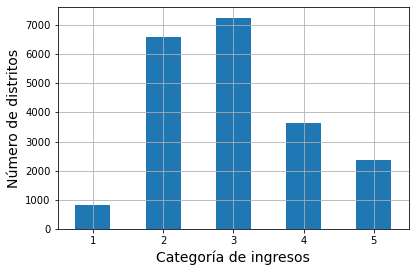

In [33]:
v["ingresos_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Categoría de ingresos")
plt.ylabel("Número de distritos")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()



In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(v, v["ingresos_cat"]):
    strat_train_set_n = v.loc[train_index]
    strat_test_set_n = v.loc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [37]:
strat_train_set, strat_test_set = strat_splits[0]

Es mucho más corto obtener una sola división estratificada:

In [38]:
strat_train_set, strat_test_set = train_test_split( v, test_size=0.2, stratify=v["ingresos_cat"], random_state=42)

In [40]:
strat_test_set["ingresos_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: ingresos_cat, dtype: float64

In [44]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["ingresos_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(v, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(v),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [35]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Descubra y visualice los datos para obtener información

In [45]:
v_train = strat_train_set.copy()

## Visualizing Geographical Data

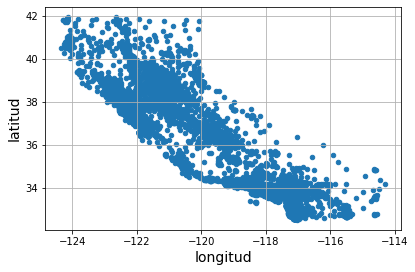

In [47]:
v.plot(kind="scatter", x="longitud", y="latitud", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

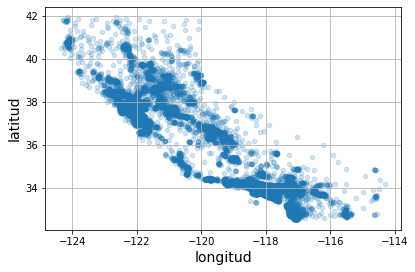

In [48]:
v.plot(kind="scatter", x="longitud", y="latitud", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

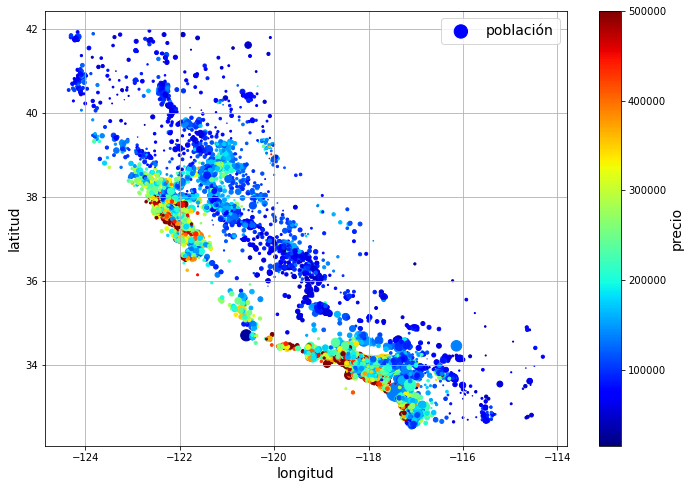

In [53]:
v_train.plot(kind="scatter", x="longitud", y="latitud", grid=True,
             s=v_train["población"] / 100, label="población",
             c="precio", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()



El argumento sharex=False corrige un error de visualización: sin él, los valores del eje x y la etiqueta no se muestran (consulte: https://github.com/pandas-dev/pandas/issues/10611).

La siguiente celda genera la primera figura del capítulo (este código no está en el libro). Es solo una versión embellecida de la figura anterior, con una imagen de California agregada en el fondo, nombres de etiquetas más agradables y sin cuadrícula.


C:\Users\Marco\AppData\Local\Temp/ipykernel_8160/4258248474.py:25: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  california_img = plt.imread(url)


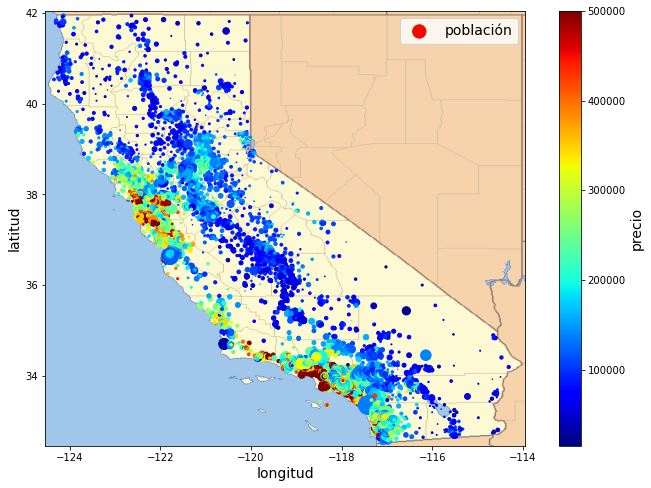

In [75]:
# código adicional: esta celda genera la primera cifra del capítulo

# Descarga la imagen de California
import matplotlib.pyplot as plt 
import urllib
from PIL import Image

url = "https://github.com/ageron/handson-ml3/raw/main/images/end_to_end_project/california.png"


from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))



v.plot(kind="scatter", x="longitud", y="latitud",
             s=v["población"] / 100, label="población",
             c="precio", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(url)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("Gráfico_del_precio_de_vivienda_en_California")
plt.show()

# Buscando Correlaciones

In [76]:
corr_matrix = v_train.corr()

In [77]:
corr_matrix["precio"].sort_values(ascending=False)

precio          1.000000
ingresos        0.687151
habitaciones    0.135140
antiguedad      0.114146
hogares         0.064590
dormitorios     0.047781
población      -0.026882
longitud       -0.047466
latitud        -0.142673
Name: precio, dtype: float64

In [79]:
v_train

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio,ingresos_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,72100.0,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,279600.0,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,82700.0,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,112500.0,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,238300.0,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,268500.0,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,90400.0,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,140400.0,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,258100.0,3


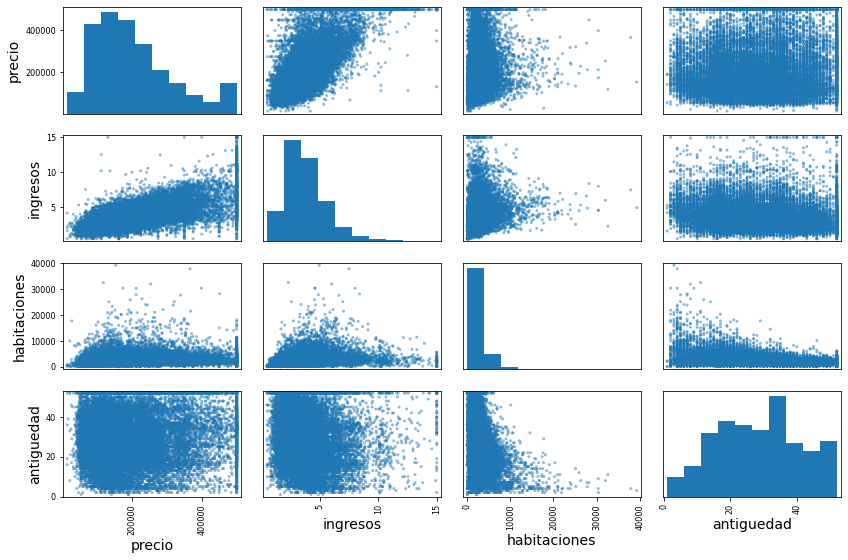

In [82]:
from pandas.plotting import scatter_matrix

attributes = ["precio", "ingresos", "habitaciones",
              "antiguedad"]
scatter_matrix(v[attributes], figsize=(12, 8))
save_fig("Trazo de Matriz de diagramas de dispersión")  # extra code
plt.show()

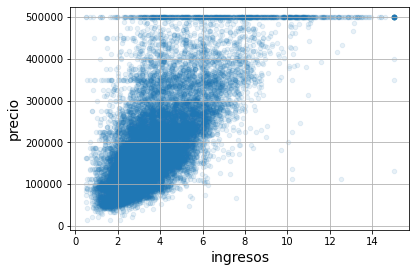

In [83]:
v_train.plot(kind="scatter", x="ingresos", y="precio",
             alpha=0.1, grid=True)
save_fig("Ingresos_vs_Precio_scatterplot")  # extra code
plt.show()

# Experimenting with Attribute Combinations

In [ ]:
v["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, unless you pass inplace=True):

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

In the book 3 options are listed to handle the NaN values:

In [ ]:
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

For each option, we'll create a copy of housing and work on that copy to avoid breaking housing. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [ ]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

## Referentes  

* Cuederno del segundo capítulo de Hands on machine learning de Aurelien Geron: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb